<a href="https://colab.research.google.com/github/mik4rok/ardupilot/blob/master/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/dataset/"

25_AHR2.csv  fly0.zip  LEVEL.tar.gz  OVER.tar.gz  PICT_ORIG.zip  sort_pict.py
AHR2_1.csv   fly.zip   LOVER.tar.gz  PICT0.zip	  python.txt


Сначала загрузим датасет из облака в colab:

Распакуем данные и зададим имя папки с ними:

In [ ]:
# Разархивация датасета в директорию 'content/cars'
!unzip -qo "/content/drive/My Drive/dataset/fly.zip" -d /content/fly

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/fly/'

Теперь вы можете увидеть, что находится в загруженной базе. Для этого функцией `listdir()` из модуля **os** получите список папок по адресу **IMAGE_PATH**:

In [ ]:
# Для работы с файлами
import os

os.listdir(IMAGE_PATH)

['LOW', 'UP', 'LEVEL']

Здесь видно, что файлы распределены по папкам, при этом названия папок соответствуют именам классов (маркам авто). Поэтому зададим список классов из списка папок. Функция `listdir()` возвращает список папок в неопределенном порядке, поэтому список классов желательно отсортировать, чтобы имена классов всегда шли в одном порядке. Метками классов будут индексы имен классов в списке классов. Количество классов определим как длину списка классов.

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 3, метки классов: ['LEVEL', 'LOW', 'UP']


Аналогично, вы можете обратиться уже к каждой папке, чтобы получить имена файлов в них. Для этого соберите вместе путь до папки и имя папки:


In [ ]:
i = 1

# Формирование пути к выборке одной марки авто
f'{IMAGE_PATH}{CLASS_LIST[i]}/'

'/content/fly/LOW/'

Теперь можно получить списки файлов для всех классов:

In [ ]:
for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

LEVEL : ['0431.png', '1214.png', '0066.png', '1247.png', '1484.png', '1289.png', '1398.png', '0758.png', '0194.png', '0122.png', '0502.png', '0751.png', '0254.png', '1253.png', '0992.png', '0532.png', '0196.png', '0456.png', '0193.png', '1166.png', '1427.png', '1344.png', '0826.png', '1501.png', '1164.png', '0406.png', '0465.png', '0034.png', '0030.png', '1278.png', '0170.png', '0944.png', '1201.png', '0024.png', '0045.png', '0821.png', '1105.png', '0487.png', '1311.png', '0819.png', '0791.png', '1036.png', '0230.png', '0018.png', '0706.png', '1504.png', '1041.png', '1464.png', '0094.png', '1307.png', '0197.png', '0876.png', '0444.png', '1277.png', '0602.png', '0222.png', '0793.png', '0763.png', '0401.png', '0874.png', '0256.png', '0054.png', '0270.png', '1135.png', '0953.png', '0209.png', '1032.png', '0788.png', '0806.png', '1238.png', '0769.png', '0438.png', '0181.png', '0918.png', '0860.png', '0807.png', '0237.png', '1150.png', '0106.png', '1390.png', '1160.png', '1037.png', '0960.p

Отобразим визуально для примера по одному изображению из каждого класса (при помощи функции `imshow()` из модуля **matplotlib.pyplot**).

Для этого импортируем необходимые библиотеки, создадим заготовку для изображений всех классов.

Далее в цикле переберем все классы. Сформируем путь к классу, выберем из него один случайный экземпляр (при помощи функции `random.choice()`) и отобразим его в ячейке (получим содержимое картинки при помощи функции `open()` из модуля **Image**).

In [ ]:
from PIL import Image                     # Отрисовка изображений
import random                             # Генерация случайных чисел 
import matplotlib.pyplot as plt           # Отрисовка графиков

%matplotlib inline

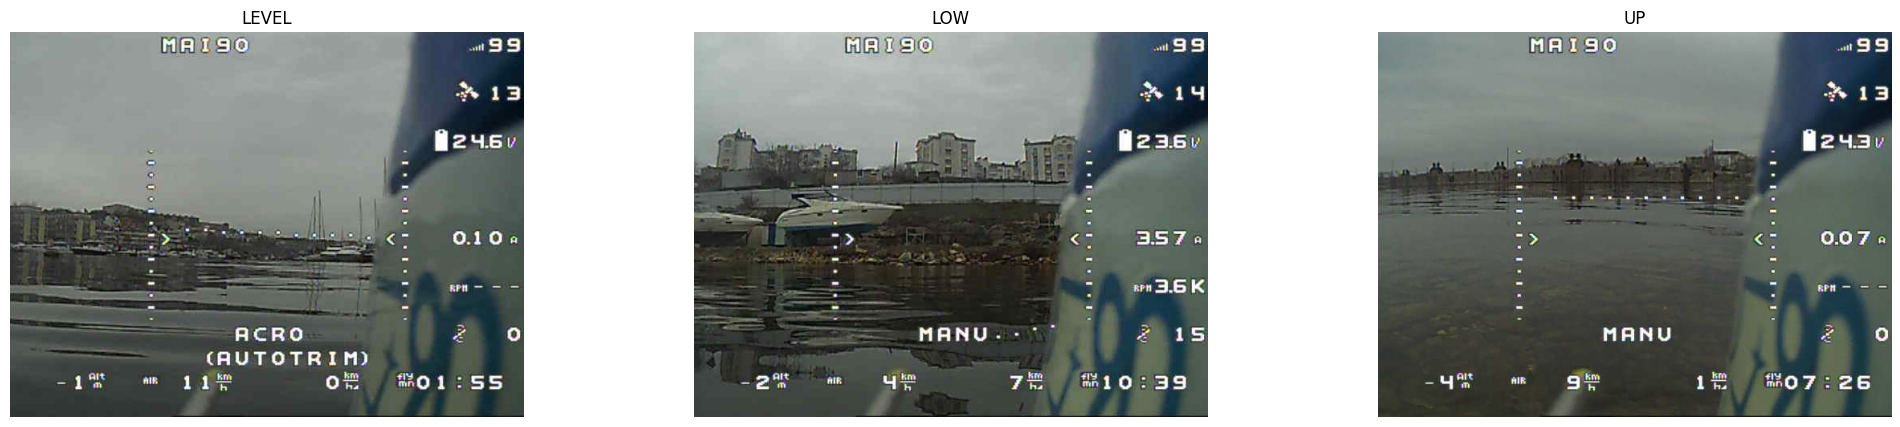

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/' 
    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path)) 
    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))  
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

Запуская ячейку несколько раз, вы каждый раз увидите новый случайный набор картинок из каждого класса.

## Создание списков файлов и их меток класса


Чтобы создать обучающую базу, вам понадобится список всех картинок машин, а также список номеров (меток) класса для них в том же порядке. То есть, например, для пятого по порядку файла в списке файлов метка его класса будет пятой в списке меток.

Сейчас фотографии машин каждого класса лежат в отдельных папках. Загружая фотографию машины, вы можете сразу записывать порядковый номер папки как метку класса машины в соответствующий список. 

Количество классов равно **CLASS_COUNT** – уже было вычислено ранее.

По аналогии с тем, как выше осматривалось содержимое папок, вы можете, получив имена файлов фотографий, собрать их в список **data_files**, а в список **data_labels** - собрать номера (метки) классов один за другим:


In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} файлов')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print('Общий размер базы для обучения:', len(data_labels))

Размер класса LEVEL составляет 1329 файлов
Размер класса LOW составляет 1084 файлов
Размер класса UP составляет 1295 файлов
Общий размер базы для обучения: 3708


In [ ]:
print('Пути к файлам: ', data_files[1085:1090])
print('Их метки классов:', data_labels[1085:1090])

Пути к файлам:  ['/content/fly/LEVEL/0289.png', '/content/fly/LEVEL/0448.png', '/content/fly/LEVEL/0720.png', '/content/fly/LEVEL/1246.png', '/content/fly/LEVEL/1199.png']
Их метки классов: [0, 0, 0, 0, 0]


## Формирование набора данных из имеющейся базы


Импортируем необходимую библиотеку, задаем желаемые размеры изображений, подготавливаем пустой список. Схема действий следующая:

- перебираем в цикле пути к файлам изображений;
    - открываем каждое изображение;
    - приводим изображение к заданному размеру;
    - переводим изображение в числовой формат;
    - присоединяем полученный массив к общему списку;
- переводим общий список изображений в numpy-массив;
- переводим общий список меток классов в numpy-массив.

In [ ]:
# Задание единых размеров изображений

IMG_LEFT = 0
IMG_TOP =  180
IMG_RIGHT = 168                  
IMG_BOTTOM = 348                 
IMG_HEIGHT = 84          # Высота изображения
IMG_WIDTH = 84           # Ширина изображения

In [ ]:
import numpy as np                        # Библиотека работы с массивами

data_images = []                          # Пустой список для данных изображений

for file_name in data_files:
    # Открытие и смена размера изображения
    # img = Image.open(file_name).resize((IMG_WIDTH, IMG_HEIGHT)) 
    img = Image.open(file_name).crop((IMG_LEFT, IMG_TOP, IMG_RIGHT, IMG_BOTTOM)).resize((IMG_HEIGHT, IMG_WIDTH))
    img_np = np.array(img)                # Перевод в numpy-массив
    data_images.append(img_np)            # Добавление изображения в виде numpy-массива к общему списку

x_data = np.array(data_images)            # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)            # Перевод общего списка меток класса в numpy-массив

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 3708 фотографий следующей формы: (84, 84, 3)
Общий массив данных изображений следующей формы: (3708, 84, 84, 3)
Общий массив меток классов следующей формы: (3708,)


In [ ]:
x_data[0]

array([[[ 72,  72,  72],
        [ 80,  80,  80],
        [ 91,  91,  91],
        ...,
        [144, 151, 149],
        [144, 151, 149],
        [144, 151, 149]],

       [[ 83,  83,  83],
        [ 72,  72,  71],
        [ 88,  88,  88],
        ...,
        [144, 151, 149],
        [144, 151, 149],
        [144, 151, 149]],

       [[ 68,  75,  67],
        [ 72,  80,  71],
        [ 83,  91,  83],
        ...,
        [141, 148, 146],
        [141, 148, 146],
        [141, 148, 146]],

       ...,

       [[ 47,  48,  41],
        [ 49,  50,  43],
        [ 51,  52,  45],
        ...,
        [ 46,  43,  35],
        [ 53,  53,  46],
        [ 54,  57,  53]],

       [[ 52,  54,  41],
        [ 54,  56,  43],
        [ 56,  58,  45],
        ...,
        [ 41,  43,  25],
        [ 42,  44,  29],
        [ 46,  47,  38]],

       [[ 55,  57,  44],
        [ 56,  58,  45],
        [ 59,  61,  48],
        ...,
        [ 45,  46,  34],
        [ 44,  45,  34],
        [ 46,  47,  39]]

In [ ]:
# Нормированние массива изображений
x_data = x_data / 255.

## Создание сверточной сети


In [ ]:
# Подключение нужных слоев из модуля tensorflow.keras.layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [ ]:
# Создание модели последовательной архитектуры
model = Sequential()

# Первый сверточный блок
model.add(Conv2D(256, (4, 4), name='First_C', padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))  # (64,128,3) --> (64,128,256) меняется кол-во фильтров
#model.add(BatchNormalization(name='First_B'))  # (64,128,256) --> (64,128,256) нет изменений

# Второй сверточный блок
#model.add(Conv2D(256, (4, 4), name='Second_C', padding='same', activation='relu'))  # (64,128,256) --> (64,128,256) нет изменений
#model.add(MaxPooling2D(pool_size=(3, 3), name='Second_M'))  # сжимает размер в три раза, с потерей, т.к. padding='valid', глубина не изм. (64,128,256) --> (21,42,256)

# Третий сверточный блок
model.add(Conv2D(256, (3, 3), name='Third_C', padding='valid', dilation_rate=(3, 3), activation='relu'))  # (21,42,256) --> (21,42,256) нет изменений
#model.add(BatchNormalization(name='Third_B'))  # (21,42,256) --> (21,42,256) нет изменений
model.add(Dropout(0.3, name='Third_D'))  # (21,42,256) --> (21,42,256) нет изменений

# Четвертый сверточный блок
model.add(Conv2D(256, (3, 3), name='Fourth_C', padding='valid', dilation_rate=(3, 3) , activation='relu'))  # (21,42,256) --> (21,42,256) нет изменений
#model.add(MaxPooling2D(pool_size=(3, 3), name='Fourth_M'))  # сжимает размер в три раза, хотя padding='valid', потерь нет, т.к. делится нацело, глубина не изм. (21,42,256) --> (7,14,256)
model.add(Dropout(0.3, name='Fourth_D'))  # (7,14,256) --> (7,14,256) нет изменений

# Пятый сверточный блок
#model.add(Conv2D(512, (4, 4), name='Fifth_D', padding='same', activation='relu'))  # (7,14,256) --> (7,14,512) меняется количество фильтров
#model.add(BatchNormalization(name='Fifth_B'))  # (7,14,512) --> (7,14,512) нет изменений

# Шестой сверточный блок
#model.add(Conv2D(1024, (3, 3), name='Sixth_C', padding='valid', activation='relu'))  # (7,14,1024) --> (7,14,1024) меняется кол-во фильтров
#model.add(MaxPooling2D(pool_size=(3, 3), name='Sixth_M'))  # сжимает размер в три раза, с потерей, т.к. padding='valid', глубина не изм. (7,14,1024) --> (2,4,1024)
#model.add(Dropout(0.2, name='Sixth_D'))  # (2,4,1024) --> (2,4,1024) нет изменений

# Блок классификации
model.add(Flatten(name='Class_1'))  # слой преобразования многомерных данных в одномерные (2,4,1024) --> (2*4*1024) --> (8192)
model.add(Dense(128, activation='relu', name='Class_2'))  # полносвязный слой, меняется кол-во нейронов (8192) --> (2048)
model.add(Dense(256, activation='relu', name='Class_3'))  # полносвязный слой, меняется кол-во нейронов (2048) --> (4096)
model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_4'))  # выходной полносвязный слой, кол-во нейронов = количество классов (4096) --> (3)

Запросим сводку по архитектуре сети и проверим, верны ли расчеты форм тензоров на выходе слоев:


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_C (Conv2D)            (None, 84, 84, 256)       12544     
                                                                 
 Third_C (Conv2D)            (None, 78, 78, 256)       590080    
                                                                 
 Third_D (Dropout)           (None, 78, 78, 256)       0         
                                                                 
 Fourth_C (Conv2D)           (None, 72, 72, 256)       590080    
                                                                 
 Fourth_D (Dropout)          (None, 72, 72, 256)       0         
                                                                 
 Class_1 (Flatten)           (None, 1327104)           0         
                                                                 
 Class_2 (Dense)             (None, 128)               1

In [ ]:
# Подключение оптимизатора Adam
from tensorflow.keras.optimizers import Adam

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.000001), metrics=['accuracy'])

Функция потерь **sparse_categorical_crossentropy**, так же как и **categorical_crossentropy**, используется для классификации двух или более классов. Однако в первом случае ожидаются метки классов в виде дискретных номеров, а во втором случае - в виде векторов **one-hot encoding**.

## Обучение нейронной сети

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(x_data,  # ----------------- x_train, примеры набора данных
                           y_data,  # ----------------- y_train, метки примеров набора данных
                           validation_split=0.1,  # --- 0.2 - доля данных для валидационной (проверочной) выборки, 1-0.2=0.8 останется в обучающей
                           shuffle=True,  # ----------- перемешивание данных для равномерного обучения, соответствие экземпляра и метки сохраняется 
                           batch_size=25,  # ---------- размер пакета, который обрабатывает нейронка перед одним изменением весов
                           epochs=35,  # -------------- epochs - количество эпох обучения
                           verbose=1)  # -------------- 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/35
134/134 [==============================] - 49s 240ms/step - loss: 1.0595 - accuracy: 0.4264 - val_loss: 1.1095 - val_accuracy: 0.4636
Epoch 2/35
134/134 [==============================] - 28s 211ms/step - loss: 0.9634 - accuracy: 0.5694 - val_loss: 0.9599 - val_accuracy: 0.5741
Epoch 3/35
134/134 [==============================] - 29s 215ms/step - loss: 0.8919 - accuracy: 0.5871 - val_loss: 0.6700 - val_accuracy: 0.6765
Epoch 4/35
134/134 [==============================] - 29s 218ms/step - loss: 0.8557 - accuracy: 0.6077 - val_loss: 0.8011 - val_accuracy: 0.6496
Epoch 5/35
134/134 [==============================] - 30s 223ms/step - loss: 0.8406 - accuracy: 0.6170 - val_loss: 0.7415 - val_accuracy: 0.6496
Epoch 6/35
134/134 [==============================] - 30s 225ms/step - loss: 0.8210 - accuracy: 0.6200 - val_loss: 0.7599 - val_accuracy: 0.6496
Epoch 7/35
134/134 [==============================] - 31s 228ms/step - loss: 0.8064 - accuracy: 0.6401 - val_loss: 0.6168 - val_ac

В переменную **store_learning** как результат метода обучения модели `.fit()` записалась история обучения, значения тех самых **loss** и **accuracy** на каждой эпохе обучения. Причем как для обучающей выборки, так и для проверочной.

Вы видели эти значения в распечатке по ходу обучения модели. По окончании обучения они записались в словарь **store_learning.history**.

Чтобы обратиться к этим данным в переменной **store_learning**, используем **loss**, **val_loss**, **accuracy** и **val_accuracy** в качестве ключей словаря. Далее с помощью методов из модуля **matplotlib.pyplot** покажем их в виде графиков.

Смотрите:


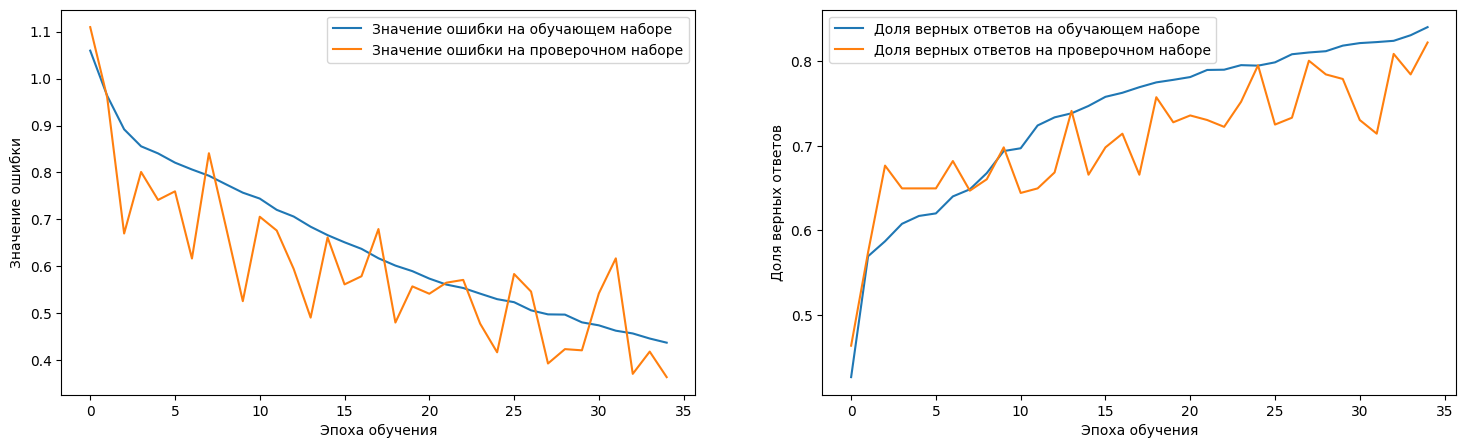

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(store_learning.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(store_learning.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

По графикам видно, что данных для обучения хватает.

Получена доля верных ответов чуть меньше 0,8.


---

**Промежуточные выводы**

---



Имеющуюся базу можно расширить и увеличить количество изображений выше и ниже уровня. В итоге качество распознавания модели будет увеличено.



Улучшить ситуацию возможно при помощи ***аугментации данных***.